# final project: 
# Crash Reporting Drivers
# group 4

## Name of students
#### Milka Cohen 
#### Moria Ezra Cahana
#### Eldad Schussheim


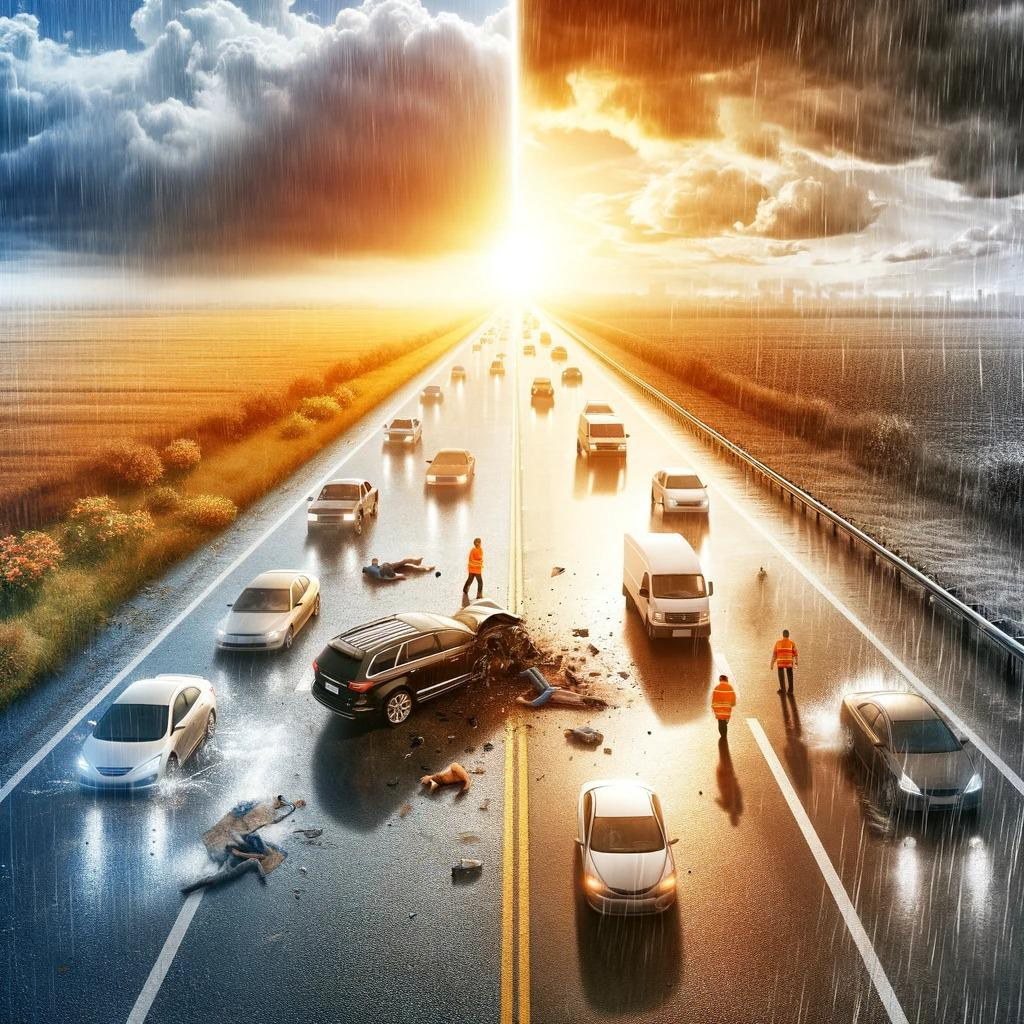

In [58]:
!pip install opencv-python
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
from PIL import Image
from IPython.display import Image, display

# Information on the data

#### The goal of our project is to minimize traffic accidents, which result in significant harm to the body, mind, and property, as much as possible
#### Taken from [catalog](https://catalog.data.gov/dataset/crash-reporting-drivers-data)

In [75]:
df="https://raw.githubusercontent.com/eldadmilkamoriya/project-eldad-milka-and-moria/main/%D7%A7%D7%95%D7%91%D7%A5%20%D7%AA%D7%90%D7%95%D7%A0%D7%95%D7%AA%20%D7%93%D7%A8%D7%9B%D7%99%D7%9D%20(2).csv"
crash_df=pd.read_csv(df)
crash_df.shape

(101679, 19)

In [62]:
crash_df.head(6)

,ACRS Report Type,Crash Date/Time,Related Non-Motorist,Collision Type,Weather,Surface Condition,Light,Driver At Fault,Injury Severity,Driver Distracted By,Vehicle Damage Extent,Vehicle First Impact Location,Vehicle Second Impact Location,Vehicle Body Type,Vehicle Movement,Speed Limit,Vehicle Year,Vehicle Make,Equipment Problems
0,Injury Crash,04/23/2020 02:58:00 PM,OTHER,OTHER,RAINING,WET,DAYLIGHT,No,NO APPARENT INJURY,NOT DISTRACTED,SUPERFICIAL,TWELVE OCLOCK,TWELVE OCLOCK,PASSENGER CAR,STARTING FROM LANE,25,2016,CADI,NO MISUSE
1,Property Damage Crash,03/11/2018 15:40,NaN,OTHER,CLEAR,NaN,DAYLIGHT,Yes,NO APPARENT INJURY,LOOKED BUT DID NOT SEE,SUPERFICIAL,SIX OCLOCK,SIX OCLOCK,PASSENGER CAR,BACKING,5,2015,HYUN,NO MISUSE
2,Property Damage Crash,10/10/2021 01:20,NaN,STRAIGHT MOVEMENT ANGLE,CLEAR,DRY,DARK LIGHTS ON,Yes,NO APPARENT INJURY,LOOKED BUT DID NOT SEE,FUNCTIONAL,FOUR OCLOCK,FOUR OCLOCK,PASSENGER CAR,MOVING CONSTANT SPEED,40,2005,NISSAN,NaN
3,Injury Crash,10/24/2018 03:59:00 PM,NaN,OTHER,CLEAR,DRY,DAYLIGHT,No,SUSPECTED SERIOUS INJURY,UNKNOWN,DISABLING,NINE OCLOCK,NINE OCLOCK,PASSENGER CAR,MOVING CONSTANT SPEED,40,2016,NISS,NO MISUSE
4,Property Damage Crash,10/01/2018 05:40,NaN,STRAIGHT MOVEMENT ANGLE,CLEAR,DRY,DAWN,Yes,NO APPARENT INJURY,LOOKED BUT DID NOT SEE,DISABLING,FIVE OCLOCK,FOUR OCLOCK,PASSENGER CAR,ACCELERATING,45,2013,JEEP,NO MISUSE
5,Injury Crash,04/30/2018 12:00:00 PM,NaN,SAME DIR REAR END,CLEAR,DRY,DAYLIGHT,No,NO APPARENT INJURY,NOT DISTRACTED,FUNCTIONAL,SIX OCLOCK,SIX OCLOCK,PASSENGER CAR,STOPPED IN TRAFFIC LANE,35,2015,TOYOTA,NaN


# Wrangling data

In [63]:
crash_df.isnull().sum()

ACRS Report Type                       0
Crash Date/Time                        0
Related Non-Motorist              119205
Collision Type                       425
Weather                             9575
Surface Condition                  14177
Light                               1016
Driver At Fault                        0
Injury Severity                        0
Driver Distracted By                   0
Vehicle Damage Extent                217
Vehicle First Impact Location        117
Vehicle Second Impact Location       193
Vehicle Body Type                   1813
Vehicle Movement                     271
Speed Limit                            0
Vehicle Year                           0
Vehicle Make                          14
Equipment Problems                 24637
dtype: int64

In [64]:
crash_df["Related Non-Motorist"].fillna("unknown",inplace=True)  
crash_df["Weather"].fillna("unknown",inplace=True)   
crash_df["Surface Condition"].fillna("unknown",inplace=True)   
crash_df["Vehicle Movement"].fillna("unknown",inplace=True)
crash_df["Equipment Problems"].fillna("unknown",inplace=True)
crash_df.dtypes

ACRS Report Type                  object
Crash Date/Time                   object
Related Non-Motorist              object
Collision Type                    object
Weather                           object
Surface Condition                 object
Light                             object
Driver At Fault                   object
Injury Severity                   object
Driver Distracted By              object
Vehicle Damage Extent             object
Vehicle First Impact Location     object
Vehicle Second Impact Location    object
Vehicle Body Type                 object
Vehicle Movement                  object
Speed Limit                        int64
Vehicle Year                       int64
Vehicle Make                      object
Equipment Problems                object
dtype: object

# Noisy data

## Accidents and injuries over the years

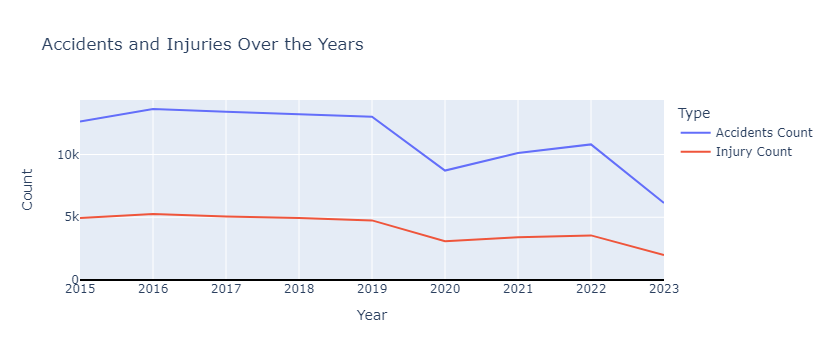

In [65]:
accidents_data = {'Year': [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
                  'Accidents Count': [12628, 13627, 13411, 13217, 13019, 8721, 10118, 10805, 6133]}
df_accidents = pd.DataFrame(accidents_data)

injury_data = {'Year': [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
               'Injury Count': [4939, 5262, 5051, 4943, 4749, 3084, 3409, 3555, 1986]}
df_injuries = pd.DataFrame(injury_data)

df_combined = pd.merge(df_accidents, df_injuries, on='Year')

fig = px.line(df_combined, x='Year', y=['Accidents Count', 'Injury Count'],
              labels={'value': 'Count', 'variable': 'Type', 'Year': 'Year'},
              title='Accidents and Injuries Over the Years')

fig.update_yaxes(zeroline=True, zerolinewidth=2, zerolinecolor='black', rangemode='tozero')

fig.show() 

## Adding new columns

In [66]:
crash_df['Crash Date/Time'] = pd.to_datetime(crash_df['Crash Date/Time'])

crash_df['Hours'] = crash_df['Crash Date/Time'].dt.strftime('%H:00')

crash_df['Year'] =crash_df['Crash Date/Time'].dt.year

crash_df[['Crash Date/Time', 'Hours',"Year"]].head(4)

,Crash Date/Time,Hours,Year
0,2020-04-23 14:58:00,14:00,2020
1,2018-03-11 15:40:00,15:00,2018
2,2021-10-10 01:20:00,01:00,2021
3,2018-10-24 15:59:00,15:00,2018


## First analysis - three types of vehicles

#### We want to examine whether there is a difference in durability and protection among three types of cars during an accident:

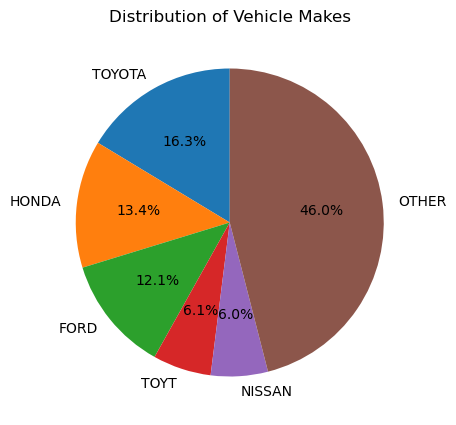

In [67]:
data = {'Vehicle Make': ['TOYOTA', 'HONDA', 'FORD', 'TOYT', 'NISSAN',"OTHER"],
        'Count': [16620, 13616, 12350, 6235, 6086,46772]} 


df = pd.DataFrame(data)


plt.figure(figsize=(5, 5))
plt.pie(df['Count'], labels=df['Vehicle Make'], autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Vehicle Makes')
plt.show()

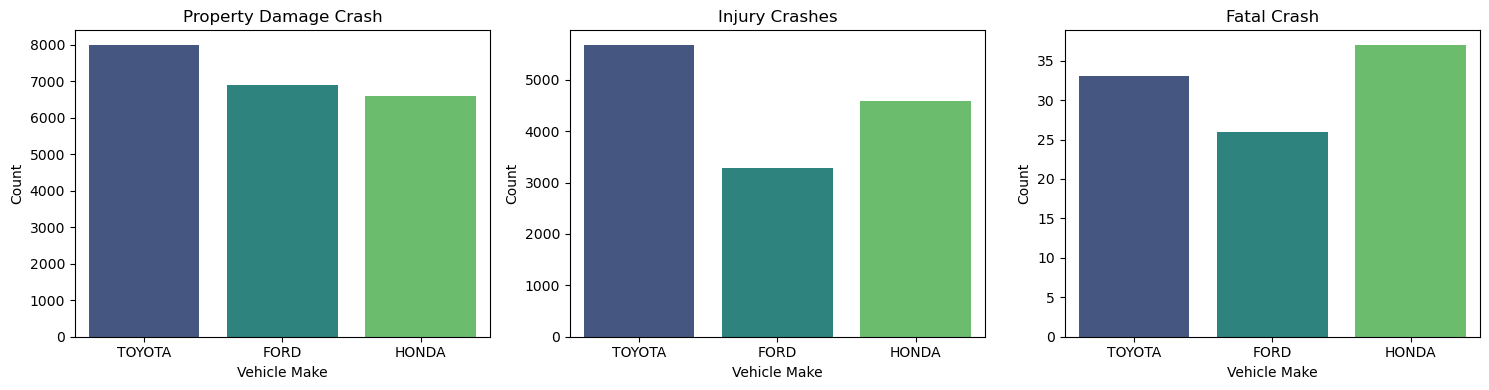

In [68]:
#לקחנו את ה3 סוגי רכבים שנמצאים הכי הרבה ובדקנו את עמידות סוג הרכב בתאונות 
data1 = {"TOYOTA": 5677, 'FORD': 3285, 'HONDA': 4588}
df1 = pd.DataFrame(list(data1.items()), columns=['Vehicle Make', 'Count'])

data2 = {"TOYOTA": 7999, 'FORD': 6907, 'HONDA': 6586}
df2 = pd.DataFrame(list(data2.items()), columns=['Vehicle Make', 'Count'])

data3 = {"TOYOTA":33, 'FORD': 26, 'HONDA': 37}
df3 = pd.DataFrame(list(data3.items()), columns=['Vehicle Make', 'Count'])

fig, axs = plt.subplots(1, 3, figsize=(15, 4))

# גרף ראשון - Property Damage Crash
sns.barplot(data=df2, x='Vehicle Make', y='Count', palette='viridis', ax=axs[0])
axs[0].set_xlabel('Vehicle Make')
axs[0].set_ylabel('Count')
axs[0].set_title("Property Damage Crash")

# גרף שני - Injury Crashes
sns.barplot(data=df1, x='Vehicle Make', y='Count', palette='viridis', ax=axs[1])
axs[1].set_xlabel('Vehicle Make')
axs[1].set_ylabel('Count')
axs[1].set_title("Injury Crashes")

# גרף שלישי - Fatal Crash
sns.barplot(data=df3, x='Vehicle Make', y='Count', palette='viridis', ax=axs[2])
axs[2].set_xlabel('Vehicle Make')
axs[2].set_ylabel('Count')
axs[2].set_title("Fatal Crash")

plt.tight_layout()  
plt.show()

#### The three graphs presented to compare the three most common companies of cars: Toyota, Ford, and Honda.

#### The first graph examines the difference in the number of accidents causing light to moderate damage for the three companies. The findings discover that there is not a significant gap between them.

#### The second graph focuses on the number of bodily injuries in each type of accident. According to the graph, Ford has the lowest number of injuries in body accidents.

#### The third graph refer the quantity of fatal accidents for each type of cars. It shows that Ford has the smallest number of fatal accidents.

#### Based on these findings, it can be concluded that Ford vehicles are more safety in accidents and provide better protection for drivers and passengers compared to Toyota and Honda.

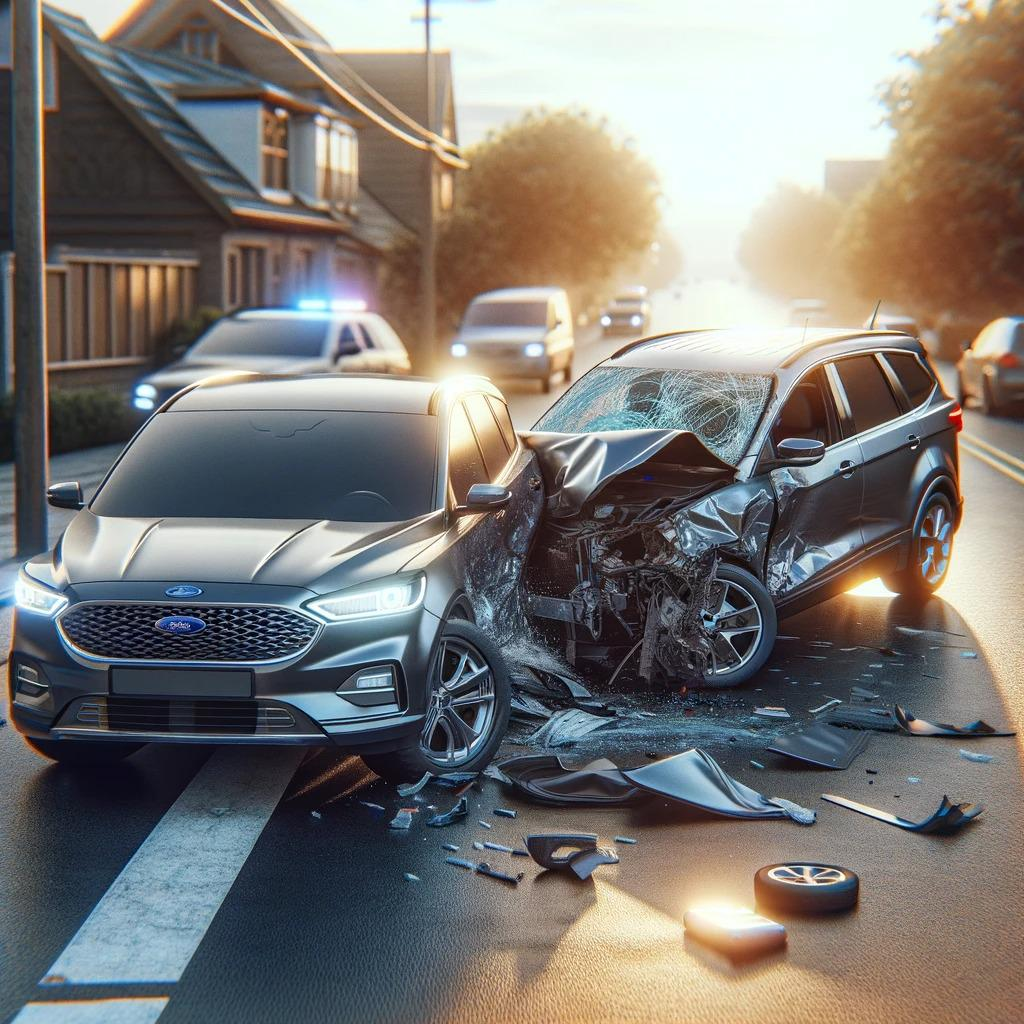

## Second analysis - Hours and weather

#### Is there a connection between accidents occurring at specific hours and certain weather conditions?

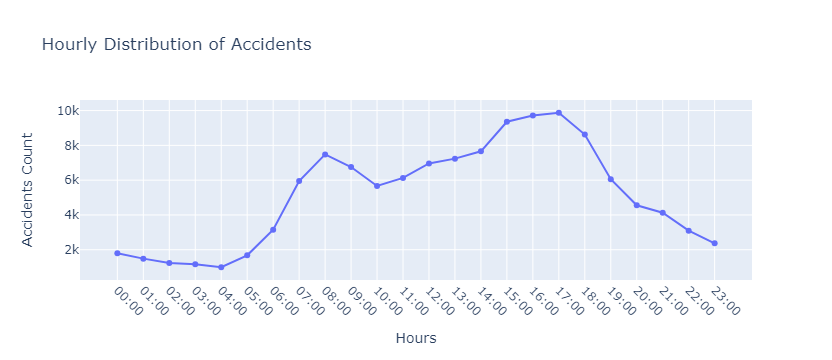

In [69]:
fig = px.line(crash_df.groupby('Hours').size().reset_index(name='Accidents Count'),
              x='Hours', y='Accidents Count', markers=True,
              title='Hourly Distribution of Accidents')

fig.update_xaxes(tickangle=45, tickmode='array', tickvals=crash_df['Hours'].unique(),
                 ticktext=crash_df['Hours'].unique())

fig.show()

#### The graph illustrates the frequency of accidents throughout the day. between 11:00 and 19:00 there is the highest number of accidents. Notably, at 17:00, there is a peak, marking a record number of accidents

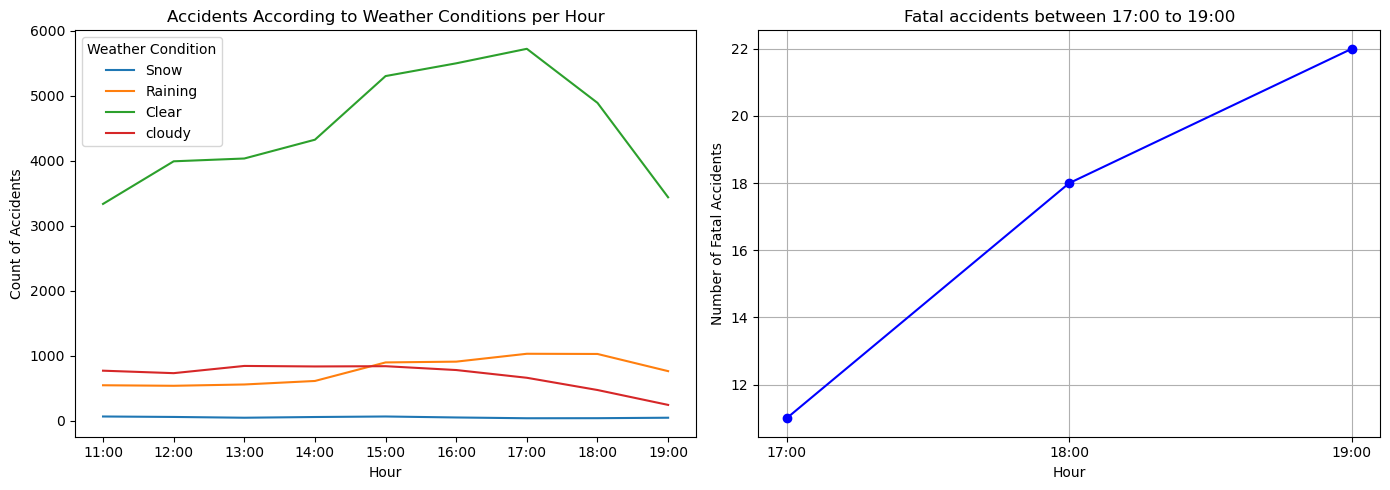

In [70]:
data_weather = {
    'Hour': ["11:00","12:00","13:00","14:00",'15:00','16:00','17:00',"18:00","19:00"],
    'snow': [69,62,50,61,69, 54, 42,43,50],
    'raining': [549,541,561,615,900, 912, 1033,1030,766],
    'clear': [3336,3991,4034,4323,5301, 5497, 5720,4889,3438],
    "cloudy":[773,735,846,838,842,783,664,476,247]
}
df_weather = pd.DataFrame(data_weather)

# גרף של מזג האוויר
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.lineplot(x='Hour', y='snow', data=df_weather, label='Snow')
sns.lineplot(x='Hour', y='raining', data=df_weather, label='Raining')
sns.lineplot(x='Hour', y='clear', data=df_weather, label='Clear')
sns.lineplot(x='Hour', y='cloudy', data=df_weather, label='cloudy')
plt.title('Accidents According to Weather Conditions per Hour')
plt.xlabel('Hour')
plt.ylabel('Count of Accidents')
plt.legend(title='Weather Condition')

# גרף של תאונות קטלניות
hours_fatal = ['17:00',"18:00" ,'19:00']
fatal_accidents = [11,18, 22]

plt.subplot(1, 2, 2)
plt.plot(hours_fatal, fatal_accidents, marker='o', linestyle='-', color='b')
plt.title("Fatal accidents between 17:00 to 19:00")
plt.xlabel('Hour')
plt.ylabel('Number of Fatal Accidents')
plt.grid(True)

plt.tight_layout()  
plt.show()

#### According to the graph illustrating weather conditions and their corresponding hours, it is evident that the number of accidents is significantly higher during clear weather compared to other conditions such as snow, rain, or cloudy weather.
#### According to the graph that shows the fatal accidents: between the hours of 17:00 and 19:00. 
#### We see that precisely at 19:00 there is a record of fatal accidents, compared to 17:00 when there is a record of accidents.

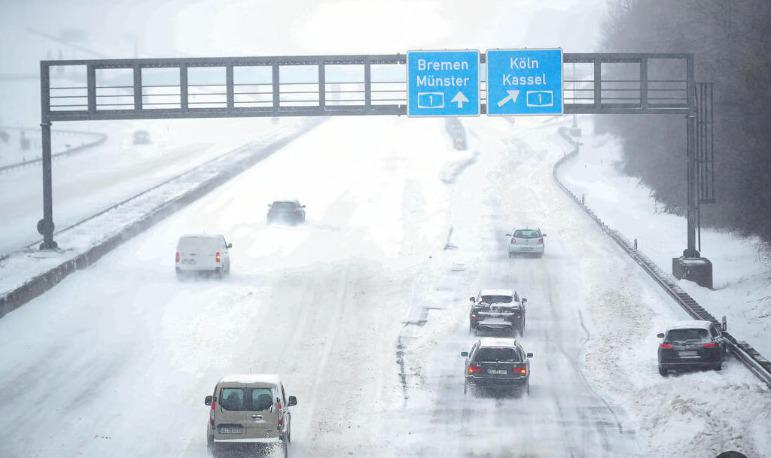

## Third analysis - movement and speed of the vehicle

#### Is there a correlation between the speed limit and the vehicle's movement at the time of the accident?

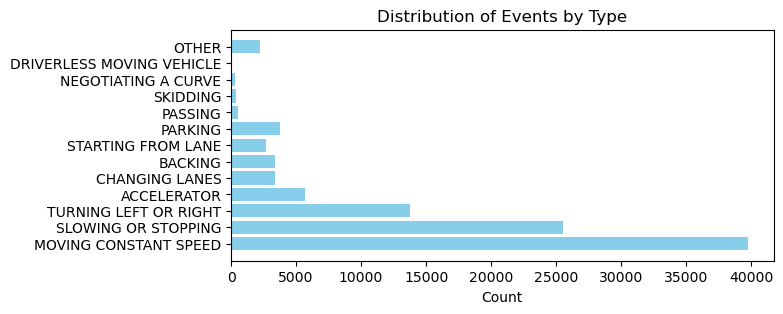

In [71]:
categories = ['MOVING CONSTANT SPEED', 'SLOWING OR STOPPING', 'TURNING LEFT OR RIGHT', 
              'ACCELERATOR', 'CHANGING LANES', 'BACKING', 'STARTING FROM LANE',
              'PARKING', 'PASSING', 'SKIDDING', 'NEGOTIATING A CURVE',
              'DRIVERLESS MOVING VEHICLE', 'OTHER']

values = [39736,25524,13741,5717,3379,3396,2675,3756,558,395,328,20,2243]

plt.figure(figsize=(7, 3))
plt.barh(categories, values, color='skyblue')
plt.xlabel('Count')
plt.title('Distribution of Events by Type')
plt.show()

#### In this graph, we observe the movement of the vehicle at the time of the accident. It is evident that the majority of accidents occur when the vehicle is traveling at a constant speed.

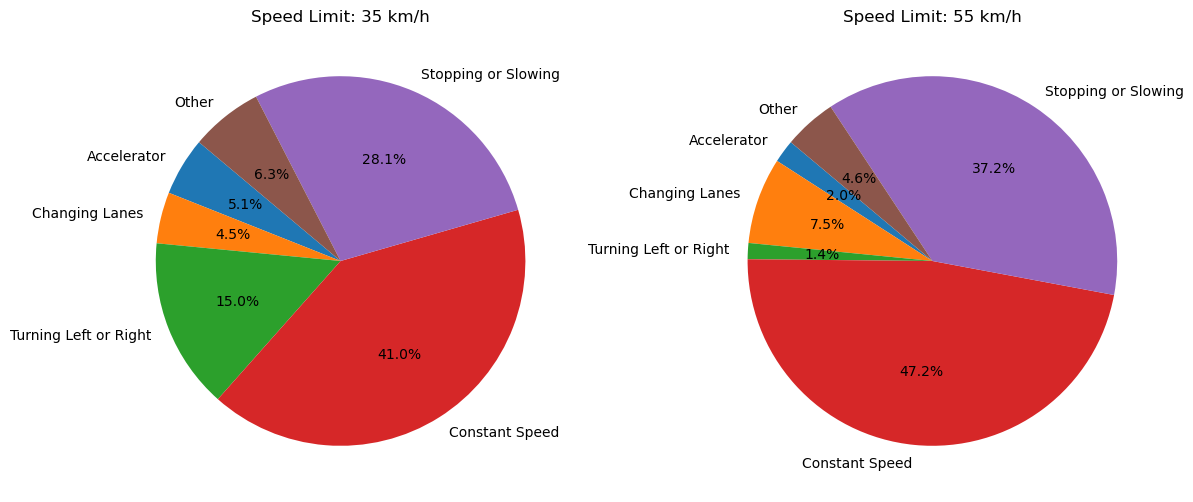

In [72]:
categories_35 = ["Accelerator", "Changing Lanes", "Turning Left or Right", "Constant Speed", "Stopping or Slowing", "Other"]
values_35 = [1511, 1331, 4440, 12168, 8333, 1875]

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.pie(values_35, labels=categories_35, autopct='%1.1f%%', startangle=140)
plt.title('Speed Limit: 35 km/h')

categories_55 = ["Accelerator", "Changing Lanes", "Turning Left or Right", "Constant Speed", "Stopping or Slowing", "Other"]
values_55 = [47, 177, 33, 1107, 873, 108]
plt.subplot(1, 2, 2)
plt.pie(values_55, labels=categories_55, autopct='%1.1f%%', startangle=140)
plt.title('Speed Limit: 55 km/h')

plt.show()

#### We aimed to investigate a potential correlation between the speed limit in specific locations and the vehicle's movement at the time of the accident.
#### According to the data, at a speed limit of 35 kph on roads near residences or neighborhoods, the majority of accidents occur when the vehicle is traveling at a constant speed. Similarly, with a speed limit of 55 kph on urban roads, most accidents happen when the vehicle is traveling at a constant speed.

## Fourth analysis - distractions that affect the driver

#### Which distractions impact drivers?

#### Is there a correlation between adverse weather conditions and mental distress?

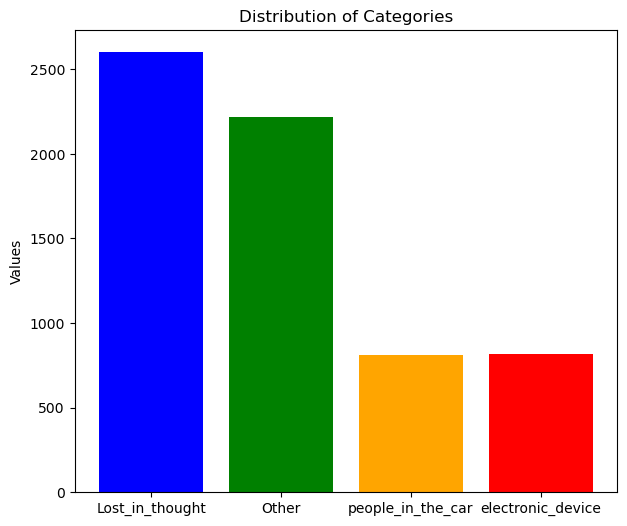

In [73]:
categories = ['Lost_in_thought', 'Other', 'people_in_the_car', 'electronic_device']
values = [2602, 2218, 813, 819]

colors = ['blue', 'green', 'orange', 'red']
plt.figure(figsize=(7, 6))
plt.bar(categories, values, color=colors)
plt.ylabel('Values')
plt.title('Distribution of Categories')
plt.show()

#### It is evident that the distraction that significantly impacts drivers during driving, leading to the highest number of accidents, is being 'lost in thought' or 'daydreaming.

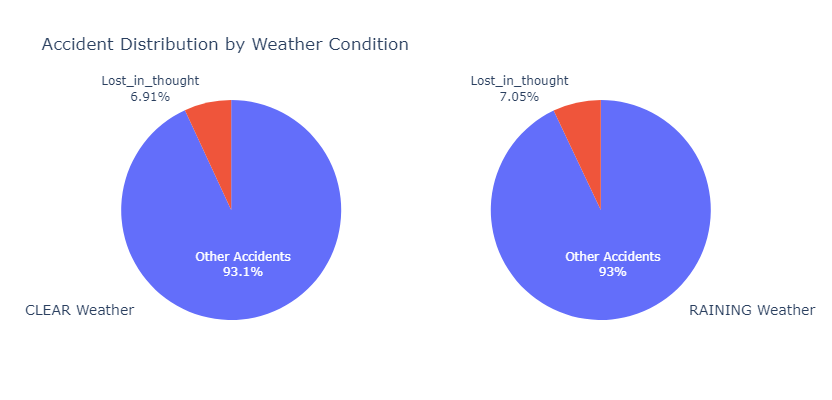

In [74]:
labels = ['Lost_in_thought', 'Other Accidents']
values_clear = [6.91, 93.09]
values_raining = [7.05, 92.95]

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]],
                    subplot_titles=['CLEAR Weather', 'RAINING Weather'])

fig.add_trace(go.Pie(labels=labels, values=values_clear, name='CLEAR Weather', textinfo='percent+label'),
              1, 1)
fig.add_trace(go.Pie(labels=labels, values=values_raining, name='RAINING Weather', textinfo='percent+label'),
              1, 2)

fig.update_layout(title='Accident Distribution by Weather Condition',
                  showlegend=False,  
                  height=400, width=800, 
                  annotations=[dict(text='CLEAR Weather', x=0, y=0, font=dict(size=14), showarrow=False),
                               dict(text='RAINING Weather', x=1, y=0, font=dict(size=14), showarrow=False)])
fig.show()

#### We examined the primary factor influencing drivers during travel, which is 'loss of thought.
#### Our findings indicate that this factor affects a consistent percentage of accidents in both rainy and clear weather.

#### During the work we used AI software and chat GPT